In [2]:
import pandas as pd
import numpy as np

%matplotlib inline


df_world_oil_prices = pd.read_csv('../data/word_oil_prices.csv')
df_br_oil_prices = pd.read_csv('../data/br_oil_prices_per_state_2004_2021.csv')

df_usd_brl = pd.read_csv('../data/usd_brl_data.csv')
df_salario_minimo = pd.read_csv('../data/salario_minimo_brasil.csv', delimiter=";")
df_populacao_por_estado = pd.read_csv('../data/populacao_por_estado.csv')
df_produto_interno_estados = pd.read_csv('../data/tabela_produto_interno_estados.csv')

In [3]:
df_world_oil_prices['Date'] = df_world_oil_prices['Date'].astype('datetime64[ns]')

Filtrei as datas do período que a gente precisa

In [4]:
df_world_oil_prices = df_world_oil_prices.loc[(df_world_oil_prices['Date'] >= '2004-05-09') & (df_world_oil_prices['Date'] < '2021-05-01')]
df_world_oil_prices

,Date,Price
1,2004-06-01,35.183636
2,2004-07-01,38.221364
3,2004-08-01,42.744091
4,2004-09-01,43.196818
5,2004-10-01,49.776667
...,...,...
196,2020-09-01,40.909545
197,2020-10-01,40.189545
198,2020-11-01,42.692381
199,2020-12-01,49.993636


Renomeei as colunas retirando acento e ç

In [5]:
df_br_oil_prices = df_br_oil_prices.rename(columns={df_br_oil_prices.columns[0]: 'DATA INICIAL',
                                 df_br_oil_prices.columns[1]: 'DATA FINAL',
                                 df_br_oil_prices.columns[2]: 'REGIAO',
                                 df_br_oil_prices.columns[4]: 'PRODUTO',                
                                 df_br_oil_prices.columns[5]: 'NUMERO DE POSTOS PESQUISADOS',
                                 df_br_oil_prices.columns[7]: 'PRECO MEDIO REVENDA', 
                                 df_br_oil_prices.columns[8]: 'DESVIO PADRAO REVENDA', 
                                 df_br_oil_prices.columns[9]: 'PRECO MINIMO REVENDA',
                                df_br_oil_prices.columns[10]: 'PRECO MAXIMO REVENDA',
                                df_br_oil_prices.columns[11]: 'MARGEM MEDIA REVENDA',
                                df_br_oil_prices.columns[12]: 'COEF VARIACAO REVENDA'})

In [6]:
df_br_oil_prices['DATA INICIAL'] = df_br_oil_prices['DATA INICIAL'].astype('datetime64[ns]')
df_br_oil_prices['DATA FINAL'] = df_br_oil_prices['DATA FINAL'].astype('datetime64[ns]')

In [57]:
df_br_oil_prices

,DATA INICIAL,DATA FINAL,REGIAO,ESTADO,PRODUTO,NUMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PRECO MEDIO REVENDA,DESVIO PADRAO REVENDA,PRECO MINIMO REVENDA,PRECO MAXIMO REVENDA,MARGEM MEDIA REVENDA,COEF VARIACAO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.190,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.890,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.180,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.090,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.050,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120818,2021-04-25,2021-05-01,NORTE,RORAIMA,OLEO DIESEL S10,12,R$/l,4.582,0.056,4.510,4.690,-99999.0,0.012,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120819,2021-04-25,2021-05-01,SUL,SANTA CATARINA,OLEO DIESEL S10,100,R$/l,4.141,0.187,3.838,4.739,-99999.0,0.045,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120820,2021-04-25,2021-05-01,SUDESTE,SAO PAULO,OLEO DIESEL S10,886,R$/l,4.246,0.216,3.769,5.199,-99999.0,0.051,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120821,2021-04-25,2021-05-01,NORDESTE,SERGIPE,OLEO DIESEL S10,33,R$/l,4.464,0.205,4.190,4.699,-99999.0,0.046,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0


Retirei as colunas que não serão necessárias para o objetivo do trabalho

In [7]:
df_br_oil_prices = df_br_oil_prices.drop(columns = {df_br_oil_prices.columns[13],
                                                    df_br_oil_prices.columns[14], 
                                                    df_br_oil_prices.columns[15], 
                                                    df_br_oil_prices.columns[16], 
                                                    df_br_oil_prices.columns[17]}, axis=1)

Converti de objeto para numérico

In [8]:
df_br_oil_prices['MARGEM MEDIA REVENDA'] = pd.to_numeric(df_br_oil_prices['MARGEM MEDIA REVENDA'],errors = 'coerce')

Selecionei as colunas que tem margem media de revenda negativa

In [9]:
df_br_oil_prices[df_br_oil_prices['MARGEM MEDIA REVENDA'] < 0]

,DATA INICIAL,DATA FINAL,REGIAO,ESTADO,PRODUTO,NUMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PRECO MEDIO REVENDA,DESVIO PADRAO REVENDA,PRECO MINIMO REVENDA,PRECO MAXIMO REVENDA,MARGEM MEDIA REVENDA,COEF VARIACAO REVENDA
106906,2019-06-30,2019-07-06,SUDESTE,ESPIRITO SANTO,GNV,6,R$/m3,3.296,0.005,3.290,3.299,-99999.0,0.002
106907,2019-06-30,2019-07-06,NORDESTE,MARANHAO,GNV,1,R$/m3,3.499,0.000,3.499,3.499,-99999.0,0.000
106909,2019-06-30,2019-07-06,SUDESTE,MINAS GERAIS,GNV,6,R$/m3,3.462,0.140,3.347,3.699,-99999.0,0.040
106911,2019-06-30,2019-07-06,SUL,PARANA,GNV,2,R$/m3,3.099,0.141,2.999,3.199,-99999.0,0.045
106912,2019-06-30,2019-07-06,NORDESTE,PERNAMBUCO,GNV,11,R$/m3,2.699,0.272,2.699,3.600,-99999.0,0.101
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120818,2021-04-25,2021-05-01,NORTE,RORAIMA,OLEO DIESEL S10,12,R$/l,4.582,0.056,4.510,4.690,-99999.0,0.012
120819,2021-04-25,2021-05-01,SUL,SANTA CATARINA,OLEO DIESEL S10,100,R$/l,4.141,0.187,3.838,4.739,-99999.0,0.045
120820,2021-04-25,2021-05-01,SUDESTE,SAO PAULO,OLEO DIESEL S10,886,R$/l,4.246,0.216,3.769,5.199,-99999.0,0.051
120821,2021-04-25,2021-05-01,NORDESTE,SERGIPE,OLEO DIESEL S10,33,R$/l,4.464,0.205,4.190,4.699,-99999.0,0.046


In [10]:
df_br_oil_prices[df_br_oil_prices.isnull().any(axis=1)]

,DATA INICIAL,DATA FINAL,REGIAO,ESTADO,PRODUTO,NUMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PRECO MEDIO REVENDA,DESVIO PADRAO REVENDA,PRECO MINIMO REVENDA,PRECO MAXIMO REVENDA,MARGEM MEDIA REVENDA,COEF VARIACAO REVENDA
1903,2005-09-25,2005-10-01,NORTE,PARA,ETANOL HIDRATADO,2,R$/l,1.694,0.283,1.690,2.090,NaN,0.167
1958,2005-10-09,2005-10-15,NORTE,RORAIMA,ETANOL HIDRATADO,3,R$/l,2.000,0.000,2.000,2.000,NaN,0.000
2012,2005-10-23,2005-10-29,NORTE,RORAIMA,ETANOL HIDRATADO,3,R$/l,2.277,0.023,2.250,2.290,NaN,0.010
2497,2006-02-26,2006-03-04,NORTE,RORAIMA,ETANOL HIDRATADO,11,R$/l,2.182,0.040,2.100,2.200,NaN,0.018
3199,2006-08-27,2006-09-02,NORTE,RORAIMA,ETANOL HIDRATADO,22,R$/l,2.285,0.068,1.980,2.300,NaN,0.030
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106664,2019-06-16,2019-06-22,SUDESTE,MINAS GERAIS,GNV,5,R$/m3,3.445,0.147,3.347,3.699,NaN,0.043
106666,2019-06-16,2019-06-22,SUL,PARANA,GNV,7,R$/m3,3.132,0.295,3.049,3.890,NaN,0.094
106811,2019-06-23,2019-06-29,SUDESTE,ESPIRITO SANTO,GNV,4,R$/m3,3.299,0.005,3.290,3.299,NaN,0.002
106813,2019-06-23,2019-06-29,SUDESTE,MINAS GERAIS,GNV,6,R$/m3,3.548,0.100,3.495,3.699,NaN,0.028


In [11]:
df_br_oil_prices["ESTADO"].unique()

array(['DISTRITO FEDERAL', 'GOIAS', 'MATO GROSSO', 'MATO GROSSO DO SUL',
       'ALAGOAS', 'BAHIA', 'CEARA', 'MARANHAO', 'PARAIBA', 'PERNAMBUCO',
       'PIAUI', 'RIO GRANDE DO NORTE', 'SERGIPE', 'ACRE', 'AMAPA',
       'AMAZONAS', 'PARA', 'RONDONIA', 'RORAIMA', 'TOCANTINS',
       'ESPIRITO SANTO', 'MINAS GERAIS', 'RIO DE JANEIRO', 'SAO PAULO',
       'PARANA', 'RIO GRANDE DO SUL', 'SANTA CATARINA'], dtype=object)

Converter nome do Estado para Sigla

In [12]:
df_br_oil_prices["ESTADO"] = df_br_oil_prices["ESTADO"].replace("RONDONIA", "RO", regex=True)
df_br_oil_prices["ESTADO"] = df_br_oil_prices["ESTADO"].replace("ACRE", "AC", regex=True)
df_br_oil_prices["ESTADO"] = df_br_oil_prices["ESTADO"].replace("AMAZONAS", "AM", regex=True)
df_br_oil_prices["ESTADO"] = df_br_oil_prices["ESTADO"].replace("RORAIMA", "RR", regex=True)
df_br_oil_prices["ESTADO"] = df_br_oil_prices["ESTADO"].replace("PARA", "PA", regex=True)
df_br_oil_prices["ESTADO"] = df_br_oil_prices["ESTADO"].replace("AMAPA", "AP", regex=True)
df_br_oil_prices["ESTADO"] = df_br_oil_prices["ESTADO"].replace("TOCANTINS", "TO", regex=True)
df_br_oil_prices["ESTADO"] = df_br_oil_prices["ESTADO"].replace("MARANHAO", "MA", regex=True)
df_br_oil_prices["ESTADO"] = df_br_oil_prices["ESTADO"].replace("PIAUI", "PI", regex=True)
df_br_oil_prices["ESTADO"] = df_br_oil_prices["ESTADO"].replace("CEARA", "CE", regex=True)
df_br_oil_prices["ESTADO"] = df_br_oil_prices["ESTADO"].replace("RIO GRANDE DO NORTE", "RN", regex=True)
df_br_oil_prices["ESTADO"] = df_br_oil_prices["ESTADO"].replace("PARAIBA", "PB", regex=True)
df_br_oil_prices["ESTADO"] = df_br_oil_prices["ESTADO"].replace("PERNAMBUCO", "PE", regex=True)
df_br_oil_prices["ESTADO"] = df_br_oil_prices["ESTADO"].replace("ALAGOAS", "AL", regex=True)
df_br_oil_prices["ESTADO"] = df_br_oil_prices["ESTADO"].replace("SERGIPE", "SE", regex=True)
df_br_oil_prices["ESTADO"] = df_br_oil_prices["ESTADO"].replace("BAHIA", "BA", regex=True)
df_br_oil_prices["ESTADO"] = df_br_oil_prices["ESTADO"].replace("MINAS GERAIS", "MG", regex=True)
df_br_oil_prices["ESTADO"] = df_br_oil_prices["ESTADO"].replace("ESPIRITO SANTO", "ES", regex=True)
df_br_oil_prices["ESTADO"] = df_br_oil_prices["ESTADO"].replace("RIO DE JANEIRO", "RJ", regex=True)
df_br_oil_prices["ESTADO"] = df_br_oil_prices["ESTADO"].replace("SAO PAULO", "SP", regex=True)
df_br_oil_prices["ESTADO"] = df_br_oil_prices["ESTADO"].replace("PARANA", "PR", regex=True)
df_br_oil_prices["ESTADO"] = df_br_oil_prices["ESTADO"].replace("SANTA CATARINA", "SC", regex=True)
df_br_oil_prices["ESTADO"] = df_br_oil_prices["ESTADO"].replace("RIO GRANDE DO SUL", "RS", regex=True)
df_br_oil_prices["ESTADO"] = df_br_oil_prices["ESTADO"].replace("MATO GROSSO DO SUL", "MS", regex=True)
df_br_oil_prices["ESTADO"] = df_br_oil_prices["ESTADO"].replace("MATO GROSSO", "MT", regex=True)
df_br_oil_prices["ESTADO"] = df_br_oil_prices["ESTADO"].replace("GOIAS", "GO", regex=True)
df_br_oil_prices["ESTADO"] = df_br_oil_prices["ESTADO"].replace("DISTRITO FEDERAL", "DF", regex=True)



In [13]:
df_br_oil_prices["ESTADO"].unique()

array(['DF', 'GO', 'MT', 'MS', 'AL', 'BA', 'CE', 'MA', 'PAIBA', 'PE',
       'PI', 'RN', 'SE', 'AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO', 'ES',
       'MG', 'RJ', 'SP', 'PANA', 'RS', 'SC'], dtype=object)

In [14]:
df_br_oil_prices = df_br_oil_prices.drop(columns = {df_br_oil_prices.columns[11]})

In [15]:
df_br_oil_prices[df_br_oil_prices.isnull().any(axis=1)]

,DATA INICIAL,DATA FINAL,REGIAO,ESTADO,PRODUTO,NUMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PRECO MEDIO REVENDA,DESVIO PADRAO REVENDA,PRECO MINIMO REVENDA,PRECO MAXIMO REVENDA,COEF VARIACAO REVENDA


In [16]:
df_br_oil_prices['PRODUTO'] = df_br_oil_prices['PRODUTO'].str.replace('ÓLEO DIESEL S10', 'OLEO DIESEL S10')
df_br_oil_prices['PRODUTO'] = df_br_oil_prices['PRODUTO'].str.replace('ÓLEO DIESEL', 'OLEO DIESEL')

In [17]:
df_br_oil_prices.groupby(['PRODUTO'])['PRODUTO'].count().reset_index(name='total')

,PRODUTO,total
0,ETANOL HIDRATADO,23440
1,GASOLINA ADITIVADA,749
2,GASOLINA COMUM,23570
3,GLP,23561
4,GNV,14469
5,OLEO DIESEL,23545
6,OLEO DIESEL S10,11489


Média mensal da tabela preço do petróleo 

In [18]:
df_world_oil_prices = df_world_oil_prices.groupby(pd.PeriodIndex(df_world_oil_prices['Date'], freq="M"))['Price'].mean().reset_index()
df_world_oil_prices

,Date,Price
0,2004-06,35.183636
1,2004-07,38.221364
2,2004-08,42.744091
3,2004-09,43.196818
4,2004-10,49.776667
...,...,...
195,2020-09,40.909545
196,2020-10,40.189545
197,2020-11,42.692381
198,2020-12,49.993636


Renomeei as colunas retirando acento

In [19]:
df_usd_brl = df_usd_brl.rename(columns={df_usd_brl.columns[0]: 'DATA',
                                        df_usd_brl.columns[1]: 'ULTIMO',
                                        df_usd_brl.columns[2]: 'ABERTURA',
                                        df_usd_brl.columns[3]: 'MAXIMA',                
                                        df_usd_brl.columns[4]: 'MINIMA'})

IndexError: index 2 is out of bounds for axis 0 with size 2

Substituí as vírgulas por pontos para conseguir fazer conversão para float

In [20]:
df_usd_brl['ULTIMO'] = df_usd_brl['ULTIMO'].str.replace(',','.')
df_usd_brl['ABERTURA'] = df_usd_brl['ABERTURA'].str.replace(',','.')
df_usd_brl['MAXIMA'] = df_usd_brl['MAXIMA'].str.replace(',','.')
df_usd_brl['MINIMA'] = df_usd_brl['MINIMA'].str.replace(',','.')

KeyError: 'ULTIMO'

Transformei as strings em float

In [21]:
df_usd_brl['ULTIMO'] = pd.to_numeric(df_usd_brl['ULTIMO'],errors = 'raise')
df_usd_brl['ABERTURA'] = pd.to_numeric(df_usd_brl['ABERTURA'], errors = 'raise')
df_usd_brl['MAXIMA'] = pd.to_numeric(df_usd_brl['MAXIMA'], errors = 'raise')
df_usd_brl['MINIMA'] = pd.to_numeric(df_usd_brl['MINIMA'], errors = 'raise')

KeyError: 'ULTIMO'

Fiz a media do dolar naquele dia

In [73]:
df_usd_brl['MEDIA'] = df_usd_brl[['ULTIMO', 'ABERTURA']].mean(axis=1)
df_usd_brl

,DATA,ULTIMO,ABERTURA,MAXIMA,MINIMA,Vol.,Var%,MEDIA
0,19 de ago. de 2022,5.1695,5.1685,5.2192,5.1648,"132,82K","0,04%",5.16900
1,18 de ago. de 2022,5.1674,5.1655,5.2074,5.1283,"149,11K","0,06%",5.16645
2,17 de ago. de 2022,5.1642,5.1469,5.2144,5.1452,"167,02K","0,36%",5.15555
3,16 de ago. de 2022,5.1459,5.0987,5.1549,5.0965,"148,45K","0,98%",5.12230
4,15 de ago. de 2022,5.0961,5.0721,5.1409,5.0721,"130,15K","0,45%",5.08410
...,...,...,...,...,...,...,...,...
4836,05 de fev. de 2004,2.9310,2.9285,2.9430,2.9250,NaN,"0,41%",2.92975
4837,04 de fev. de 2004,2.9190,2.9210,2.9200,2.9010,NaN,"0,07%",2.92000
4838,03 de fev. de 2004,2.9170,2.9305,2.9390,2.9140,NaN,"-0,85%",2.92375
4839,02 de fev. de 2004,2.9420,2.9270,2.9570,2.9380,NaN,"0,26%",2.93450


Converter data para formato internacional

In [74]:
df_usd_brl['DATA'] = df_usd_brl['DATA'].str.replace(' de jan. de ','/01/', regex=True)
df_usd_brl['DATA'] = df_usd_brl['DATA'].str.replace(' de fev. de ','/02/', regex=True)
df_usd_brl['DATA'] = df_usd_brl['DATA'].str.replace(' de mar. de ','/03/', regex=True)
df_usd_brl['DATA'] = df_usd_brl['DATA'].str.replace(' de abr. de ','/04/', regex=True)
df_usd_brl['DATA'] = df_usd_brl['DATA'].str.replace(' de mai. de ','/05/', regex=True)
df_usd_brl['DATA'] = df_usd_brl['DATA'].str.replace(' de jun. de ','/06/', regex=True)
df_usd_brl['DATA'] = df_usd_brl['DATA'].str.replace(' de jul. de ','/07/', regex=True)
df_usd_brl['DATA'] = df_usd_brl['DATA'].str.replace(' de ago. de ','/08/', regex=True)
df_usd_brl['DATA'] = df_usd_brl['DATA'].str.replace(' de set. de ','/09/', regex=True)
df_usd_brl['DATA'] = df_usd_brl['DATA'].str.replace(' de out. de ','/10/', regex=True)
df_usd_brl['DATA'] = df_usd_brl['DATA'].str.replace(' de nov. de ','/11/', regex=True)
df_usd_brl['DATA'] = df_usd_brl['DATA'].str.replace(' de dez. de ','/12/', regex=True)

df_usd_brl['DATA'] = pd.to_datetime(df_usd_brl['DATA'], infer_datetime_format=True)

df_usd_brl['DATA']

0      2022-08-19
1      2022-08-18
2      2022-08-17
3      2022-08-16
4      2022-08-15
          ...    
4836   2004-02-05
4837   2004-02-04
4838   2004-02-03
4839   2004-02-02
4840   2004-01-30
Name: DATA, Length: 4841, dtype: datetime64[ns]

In [52]:
df_usd_brl['DATA'] = pd.to_datetime(df_usd_brl['DATA'], infer_datetime_format=True)

Filtrei as datas do período que a gente precisa

In [75]:
df_usd_brl = df_usd_brl.loc[(df_usd_brl['DATA'] >= '2004-05-09') & (df_usd_brl['DATA'] < '2021-05-01')]
df_usd_brl

,DATA,ULTIMO,ABERTURA,MAXIMA,MINIMA,Vol.,Var%,MEDIA
340,2021-04-30,5.4366,5.3383,5.4489,5.3351,"138,67K","1,86%",5.38745
341,2021-04-29,5.3375,5.3428,5.3798,5.3274,"130,19K","-0,10%",5.34015
342,2021-04-28,5.3430,5.4526,5.4561,5.3429,"150,99K","-1,95%",5.39780
343,2021-04-27,5.4490,5.4366,5.4673,5.4097,"139,03K","0,23%",5.44280
344,2021-04-26,5.4364,5.4757,5.4904,5.4318,"127,29K","-0,71%",5.45605
...,...,...,...,...,...,...,...,...
4765,2004-05-14,3.0910,3.1350,3.1330,3.0710,NaN,"-1,28%",3.11300
4766,2004-05-13,3.1310,3.1422,3.1490,3.1090,NaN,"-0,35%",3.13660
4767,2004-05-12,3.1420,3.0710,3.1490,3.0710,NaN,"2,18%",3.10650
4768,2004-05-11,3.0750,3.1420,3.1390,3.0710,NaN,"-2,12%",3.10850


In [41]:
df_usd_brl

,DATA,ULTIMO,ABERTURA,MAXIMA,MINIMA,Vol.,Var%,MEDIA
0,2021-04-30,5.4366,5.3383,5.4489,5.3351,"138,67K","1,86%",5.38745
1,2021-04-29,5.3375,5.3428,5.3798,5.3274,"130,19K","-0,10%",5.34015
2,2021-04-28,5.3430,5.4526,5.4561,5.3429,"150,99K","-1,95%",5.39780
3,2021-04-27,5.4490,5.4366,5.4673,5.4097,"139,03K","0,23%",5.44280
4,2021-04-26,5.4364,5.4757,5.4904,5.4318,"127,29K","-0,71%",5.45605
...,...,...,...,...,...,...,...,...
4425,2004-05-14,3.0910,3.1350,3.1330,3.0710,NaN,"-1,28%",3.11300
4426,2004-05-13,3.1310,3.1422,3.1490,3.1090,NaN,"-0,35%",3.13660
4427,2004-05-12,3.1420,3.0710,3.1490,3.0710,NaN,"2,18%",3.10650
4428,2004-05-11,3.0750,3.1420,3.1390,3.0710,NaN,"-2,12%",3.10850


Fiz a média do dólar daquele mês

In [22]:
df_usd_brl_per_month = df_usd_brl.groupby(pd.PeriodIndex(df_usd_brl['DATA'], freq="M"))['MEDIA'].mean().reset_index()
df_usd_brl_per_month

,DATA,MEDIA
0,2004-05,3.14
1,2004-06,3.13
2,2004-07,3.04
3,2004-08,3.00
4,2004-09,2.89
...,...,...
199,2020-12,5.15
200,2021-01,5.34
201,2021-02,5.41
202,2021-03,5.64


In [23]:
df_salario_minimo['PERIODO_INICIO'] = pd.to_datetime(df_salario_minimo['PERIODO_INICIO'], infer_datetime_format=True)
df_salario_minimo['PERIODO_FINAL'] = pd.to_datetime(df_salario_minimo['PERIODO_FINAL'], infer_datetime_format=True)


<AxesSubplot:xlabel='PERIODO_INICIO'>

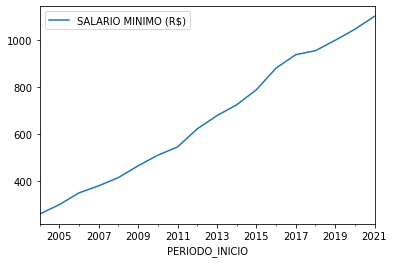

In [24]:
periodo = df_salario_minimo["PERIODO_INICIO"].dt.to_period("M") 

df_salario_minimo.groupby(periodo)[['SALARIO MINIMO (R$)']].sum().plot()


<AxesSubplot:xlabel='DATA'>

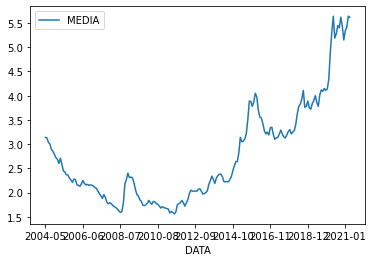

In [25]:
df_usd_brl.groupby(df_usd_brl["DATA"]).mean().plot()

<AxesSubplot:xlabel='Date'>

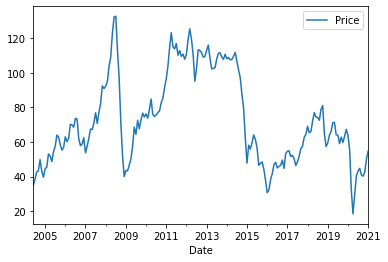

In [26]:
df_world_oil_prices.groupby(df_world_oil_prices["Date"]).mean().plot()

In [27]:
df_salario_minimo_mais_dolar = pd.merge(df_usd_brl.assign(grouper=df_usd_brl['DATA'].dt.to_period("Y")),
               df_salario_minimo.assign(grouper=df_salario_minimo['PERIODO_INICIO'].dt.to_period('Y')),
               how='left', on='grouper')

df_salario_minimo_mais_dolar["SALARIO MINIMO DOLAR"] = df_salario_minimo_mais_dolar["SALARIO MINIMO (R$)"]/df_salario_minimo_mais_dolar["MEDIA"]

df_salario_minimo_mais_dolar_por_mes = df_salario_minimo_mais_dolar.groupby(pd.PeriodIndex(df_salario_minimo_mais_dolar['DATA'], freq="M"))['SALARIO MINIMO DOLAR'].mean().reset_index()
df_salario_minimo_mais_dolar_por_mes


AttributeError: Can only use .dt accessor with datetimelike values

<AxesSubplot:xlabel='DATA'>

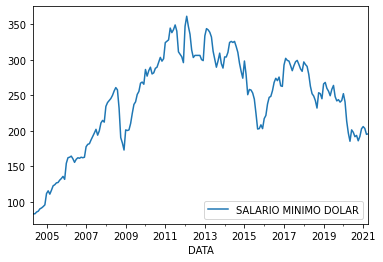

In [54]:
df_salario_minimo_mais_dolar_por_mes.groupby(df_salario_minimo_mais_dolar_por_mes["DATA"])[['SALARIO MINIMO DOLAR']].sum().plot()

In [57]:
df_salario_minimo_mais_dolar_por_mes.groupby(df_salario_minimo_mais_dolar_por_mes["DATA"])[['SALARIO MINIMO DOLAR']].sum()

df_salario_minimo_mais_dolar_por_mes.to_csv('../data/tabelas_obtidas/salario_minimo_em_dolar.csv', index=False)

In [76]:


df_petroleo_por_salario_minimo = pd.merge(df_salario_minimo_mais_dolar_por_mes.assign(grouper=df_salario_minimo_mais_dolar_por_mes['DATA']),
               df_world_oil_prices.assign(grouper=df_world_oil_prices['Date']),
               how='left', on='grouper')


df_petroleo_por_salario_minimo["GALOES_PETROLEO_POR_SALARIO"] = df_petroleo_por_salario_minimo["SALARIO MINIMO DOLAR"]/df_petroleo_por_salario_minimo["Price"]
df_petroleo_por_salario_minimo[-20:]

,DATA,SALARIO MINIMO DOLAR,grouper,Date,Price,GALOES_PETROLEO_POR_SALARIO
184,2019-09,242.233010,2019-09,2019-09,62.826667,3.855576
185,2019-10,244.009780,2019-10,2019-10,59.713043,4.086373
186,2019-11,240.481928,2019-11,2019-11,63.211905,3.804377
187,2019-12,242.822384,2019-12,2019-12,67.310000,3.607523
188,2020-01,252.415459,2020-01,2020-01,63.824783,3.954819
189,2020-02,240.783410,2020-02,2020-02,55.702000,4.322707
190,2020-03,213.701431,2020-03,2020-03,32.470000,6.581504
191,2020-04,196.798493,2020-04,2020-04,18.378500,10.708082
192,2020-05,185.283688,2020-05,2020-05,29.378947,6.306682
193,2020-06,201.348748,2020-06,2020-06,40.266818,5.000364


In [77]:
df_petroleo_por_salario_minimo

df_petroleo_por_salario_minimo.groupby(df_petroleo_por_salario_minimo["DATA"])[['SALARIO MINIMO DOLAR']].sum()

df_petroleo_por_salario_minimo.to_csv('../data/tabelas_obtidas/salario_minimo_em_petroleo.csv', index=False)

<AxesSubplot:xlabel='Date'>

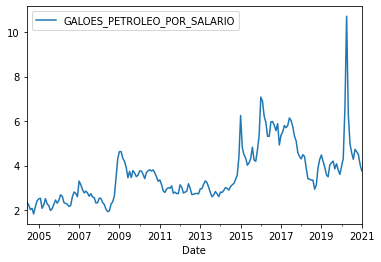

In [78]:
df_petroleo_por_salario_minimo.groupby(df_petroleo_por_salario_minimo["Date"])[['GALOES_PETROLEO_POR_SALARIO']].sum().plot()

In [29]:
df_world_oil_prices["Price"].corr(df_usd_brl["MEDIA"])

-0.63969627332834

Lendo o dataset de População por Estado

In [3]:
# df_populacao_por_estado['ano'] = pd.to_datetime(df_populacao_por_estado['ano'])
df_populacao_por_estado["sigla_uf"].unique()


array(['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN',
       'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC',
       'RS', 'MS', 'MT', 'GO', 'DF'], dtype=object)

In [41]:
df_populacao_por_estado[:20]

,ano,sigla_uf,populacao
0,1991,RO,1133265
1,1992,RO,1190739
2,1993,RO,1241693
3,1994,RO,1291214
4,1995,RO,1339507
5,1996,RO,1229306
6,1997,RO,1255522
7,1998,RO,1276173
8,1999,RO,1296856
9,2000,RO,1380952


Analisei a população para cada estado, e separei os estados que parecem ter alguma inconsistência

RO, TO, BA, RS -> parece ter inconsistencia nos dados

<AxesSubplot:xlabel='ano'>

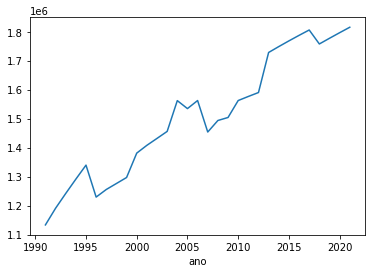

In [4]:
df_populacao_por_estado_ro = df_populacao_por_estado[df_populacao_por_estado["sigla_uf"] == "RO"]
df_populacao_por_estado_ro.set_index('ano').sort_index()["populacao"].plot()
# df_populacao_por_estado_ro

# df_populacao_por_estado_rr = df_populacao_por_estado[df_populacao_por_estado["sigla_uf"] == "RR"]
# df_populacao_por_estado_rr.set_index('ano').sort_index()["populacao"].plot()
# df_populacao_por_estado_rr[-10:]

# df_populacao_por_estado_to = df_populacao_por_estado[df_populacao_por_estado["sigla_uf"] == "TO"]
# df_populacao_por_estado_to.set_index('ano').sort_index()["populacao"].plot()

# df_populacao_por_estado_ba = df_populacao_por_estado[df_populacao_por_estado["sigla_uf"] == "BA"]
# df_populacao_por_estado_ba.set_index('ano').sort_index()["populacao"].plot()
# df_populacao_por_estado_ba

# df_populacao_por_estado_rs = df_populacao_por_estado[df_populacao_por_estado["sigla_uf"] == "RS"]
# df_populacao_por_estado_rs.set_index('ano').sort_index()["populacao"].plot()

<AxesSubplot:xlabel='ano'>

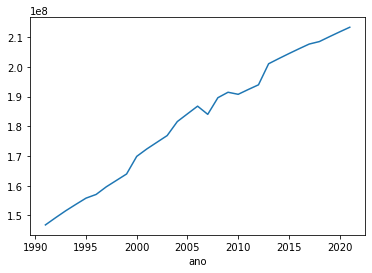

In [44]:
df_populacao_por_estado.groupby(df_populacao_por_estado["ano"])["populacao"].sum().plot()



In [11]:
df_produto_interno_estados

,sigla_uf,ano,pib,regiao
0,RO,2002,7467630,NORTE
1,AC,2002,2971301,NORTE
2,AM,2002,22093338,NORTE
3,RR,2002,2392033,NORTE
4,PA,2002,26482159,NORTE
...,...,...,...,...
481,RS,2019,482464177,SUL
482,MS,2019,106943246,CENTRO OESTE
483,MT,2019,142122028,CENTRO OESTE
484,GO,2019,208672492,CENTRO OESTE


<AxesSubplot:xlabel='ano'>

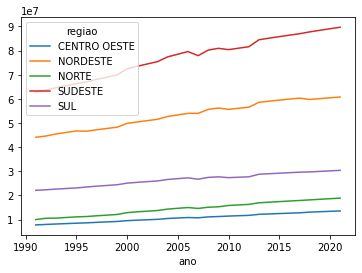

In [39]:
df_populacao_por_estado_group_by = df_populacao_por_estado.groupby(['regiao', 'ano']).sum()
df_populacao_por_estado_group_by.squeeze().unstack(level=0).plot()


<AxesSubplot:xlabel='ano'>

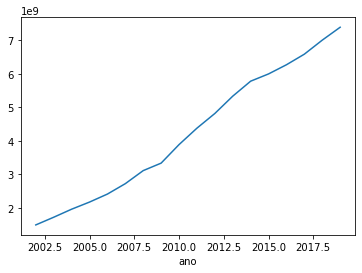

In [13]:
df_produto_interno_estados.groupby(df_produto_interno_estados["ano"])["pib"].sum().plot()

<AxesSubplot:xlabel='ano'>

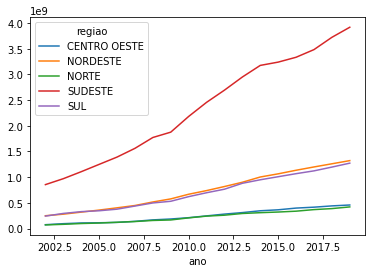

In [38]:
df_produto_interno_estados_group_by = df_produto_interno_estados.groupby(['regiao', 'ano']).sum()
df_produto_interno_estados_group_by.squeeze().unstack(level=0).plot()

<AxesSubplot:xlabel='ano'>

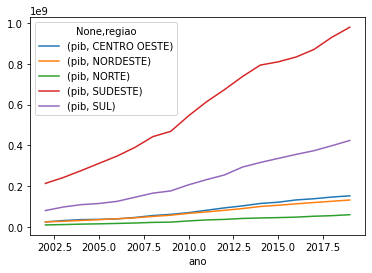

In [25]:
df_produto_interno_estados_group_by.unstack(level=0).plot()

In [34]:
df_produto_interno_estados_group_by[df_produto_interno_estados_group_by["regiao"] == "SUDESTE"]


KeyError: 'regiao'

In [35]:
df_produto_interno_estados_group_by

pib
regiao       ano               
CENTRO OESTE 2002  2.475348e+07
             2003  3.136718e+07
             2004  3.595493e+07
             2005  3.728248e+07
             2006  3.958115e+07
...                         ...
SUL          2015  3.360117e+08
             2016  3.557861e+08
             2017  3.740127e+08
             2018  3.985168e+08
             2019  4.240350e+08

[90 rows x 1 columns]

In [37]:
df_produto_interno_estados[df_produto_interno_estados["regiao"]=="SUDESTE"]

,sigla_uf,ano,pib,regiao
16,MG,2002,124071066,SUDESTE
17,ES,2002,27048997,SUDESTE
18,RJ,2002,184310915,SUDESTE
19,SP,2002,518878815,SUDESTE
43,MG,2003,144189094,SUDESTE
...,...,...,...,...
451,SP,2018,2210561949,SUDESTE
475,MG,2019,651872684,SUDESTE
476,ES,2019,137345595,SUDESTE
477,RJ,2019,779927917,SUDESTE
